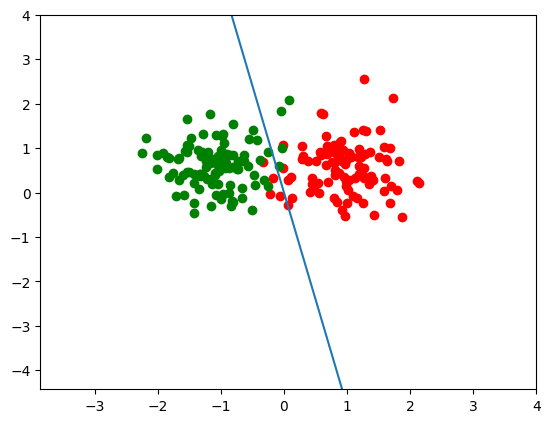

In [31]:
import numpy as np
import matplotlib.pyplot as plt


def simultaneous_shuffle(a, b):
    assert (len(a) == len(b))
    permutation = np.random.permutation(len(a))

    return a[permutation], b[permutation]

#
# generate non-linearly seperable data.
np.random.seed(2)
n = 100
mA = [1, 0.5]
sigmaA = 0.5
mB = [-1, 0.5]
sigmaB = 0.5

classA = np.zeros(shape=(3, n))
classB = np.zeros(shape=(3, n))
targetA = np.ones((n, 1))
targetB = np.zeros((n, 1))

classA[0] = np.random.normal(loc=mA[0], scale=sigmaA, size=n)
classA[1] = np.random.normal(loc=mA[1], scale=sigmaA, size=n)
classA[2] = np.ones(n)



classB[0] = np.random.normal(loc=mB[0], scale=sigmaB, size=n)
classB[1] = np.random.normal(loc=mB[1], scale=sigmaB, size=n)
classB[2] = np.ones(n)



dataset = np.concatenate((classA.T, classB.T))
targets = np.concatenate((targetA, targetB))

dataset, targets = simultaneous_shuffle(dataset, targets)
W = np.random.normal(size=(1, 3))



#The perceptron rule
lr = 0.0001

for iteration in range(10000):
 for i in range(len(dataset)):
  temp = np.dot(dataset[i],W[0])
  if temp>0:
    y=1
  else :
    y=0



  if y==0 and targets[i]==1:
    W = W + (lr * dataset[i])

  if y==1 and targets[i]==0:
    W = W - (lr * dataset[i])



fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.1)


x = np.linspace(-100, 100, 100)
y = W[0][0]/W[0][1] * x

l = plt.plot(x, y)

ax.scatter(classA[0], classA[1], color='red')
ax.scatter(classB[0], classB[1], color='green')
ax.set_ylim(np.min(dataset[1,:]) - 3, np.max(dataset[1, :])+ 3)
ax.set_xlim(np.min(dataset[0,:]) - 3, np.max(dataset[0, :])+ 3)


plt.show()